In [132]:
#importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

# nltk.download('punkt ')
# nltk.download('averaged perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')
# nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

In [133]:
sns.set_style('darkgrid')

In [134]:
# file = input("Enter file path")
DataSet = pd.read_csv('Without_polarity.csv')#reading csv file
DataSet

,Customer,Environment,Taste,Service,Price,Cities,Review
0,1,1,1,2,1,Rewa,"I hate to disagree with my fellow Yelpers, but..."
1,2,1,2,1,1,Indore,"Frozen pucks of disgust, with some of the wors..."
2,3,1,1,2,1,Dewas,"Worse of all, he humiliated his worker right i..."
3,4,1,2,1,2,Khandwa,"The staff are now not as friendly, the wait ti..."
4,5,1,1,2,2,Indore,It's too bad the food is so damn generic.
...,...,...,...,...,...,...,...
494,495,5,4,5,5,Betul,"Both of them were truly unbelievably good, and..."
495,496,5,5,5,4,Bhopal,"It's like a really sexy party in your mouth, w..."
496,497,5,5,4,5,Khandwa,"On the good side, the staff was genuinely plea..."
497,498,5,5,4,5,Khandwa,"Loved it...friendly servers, great food, wonde..."


In [135]:
DataSet.shape

(499, 7)

In [136]:
DataSet.info() #getting information of columns if they are null or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer     499 non-null    int64 
 1   Environment  499 non-null    int64 
 2   Taste        499 non-null    int64 
 3   Service      499 non-null    int64 
 4   Price        499 non-null    int64 
 5   Cities       499 non-null    object
 6   Review       499 non-null    object
dtypes: int64(5), object(2)
memory usage: 27.4+ KB


In [137]:
# Calculating Average rating of each restaurant
DataSet['Avg_Rating'] = [ (DataSet['Environment'][i] + DataSet['Taste'][i] + DataSet['Service'][i] + DataSet['Price'][i])/4 for i in range(499) ]
DataSet.head()

,Customer,Environment,Taste,Service,Price,Cities,Review,Avg_Rating
0,1,1,1,2,1,Rewa,"I hate to disagree with my fellow Yelpers, but...",1.25
1,2,1,2,1,1,Indore,"Frozen pucks of disgust, with some of the wors...",1.25
2,3,1,1,2,1,Dewas,"Worse of all, he humiliated his worker right i...",1.25
3,4,1,2,1,2,Khandwa,"The staff are now not as friendly, the wait ti...",1.50
4,5,1,1,2,2,Indore,It's too bad the food is so damn generic.,1.50


In [138]:
total_count = len(DataSet)
total_count

499

In [139]:
#calculating polarity of text reviews
Review_polarity = {}
for i ,row in tqdm(DataSet.iterrows(),total = len(DataSet)):
    text = row['Review']
    myid = row['Customer']
    Review_polarity[myid] = sia.polarity_scores(text)


  0%|          | 0/499 [00:00<?, ?it/s]

In [140]:
polarity = pd.DataFrame(Review_polarity).T
polarity.head()

,neg,neu,pos,compound
1,0.408,0.592,0.0,-0.8637
2,0.421,0.579,0.0,-0.8402
3,0.409,0.591,0.0,-0.8402
4,0.275,0.725,0.0,-0.8089
5,0.500,0.500,0.0,-0.7900


In [141]:
polarity=polarity.reset_index().rename(columns={"index":"Customer"})
polarity

,Customer,neg,neu,pos,compound
0,1,0.408,0.592,0.000,-0.8637
1,2,0.421,0.579,0.000,-0.8402
2,3,0.409,0.591,0.000,-0.8402
3,4,0.275,0.725,0.000,-0.8089
4,5,0.500,0.500,0.000,-0.7900
...,...,...,...,...,...
494,495,0.000,0.525,0.475,0.8738
495,496,0.075,0.446,0.479,0.8945
496,497,0.000,0.427,0.573,0.9022
497,498,0.000,0.339,0.661,0.9136


In [142]:
#merging dataset with the polarity scores
polarity=polarity.merge(DataSet,how='left')
polarity.head()

,Customer,neg,neu,pos,compound,Environment,Taste,Service,Price,Cities,Review,Avg_Rating
0,1,0.408,0.592,0.0,-0.8637,1,1,2,1,Rewa,"I hate to disagree with my fellow Yelpers, but...",1.25
1,2,0.421,0.579,0.0,-0.8402,1,2,1,1,Indore,"Frozen pucks of disgust, with some of the wors...",1.25
2,3,0.409,0.591,0.0,-0.8402,1,1,2,1,Dewas,"Worse of all, he humiliated his worker right i...",1.25
3,4,0.275,0.725,0.0,-0.8089,1,2,1,2,Khandwa,"The staff are now not as friendly, the wait ti...",1.50
4,5,0.500,0.500,0.0,-0.7900,1,1,2,2,Indore,It's too bad the food is so damn generic.,1.50


In [143]:
# data without sentiment analysis
Base_data = polarity[['Customer','Environment','Taste','Service','Price','Cities','Avg_Rating']]
Base_data.head()

,Customer,Environment,Taste,Service,Price,Cities,Avg_Rating
0,1,1,1,2,1,Rewa,1.25
1,2,1,2,1,1,Indore,1.25
2,3,1,1,2,1,Dewas,1.25
3,4,1,2,1,2,Khandwa,1.50
4,5,1,1,2,2,Indore,1.50


In [144]:
Polarity_data = polarity[['Customer','neg','neu','pos','compound' , 'Review']]
Polarity_data.head()

,Customer,neg,neu,pos,compound,Review
0,1,0.408,0.592,0.0,-0.8637,"I hate to disagree with my fellow Yelpers, but..."
1,2,0.421,0.579,0.0,-0.8402,"Frozen pucks of disgust, with some of the wors..."
2,3,0.409,0.591,0.0,-0.8402,"Worse of all, he humiliated his worker right i..."
3,4,0.275,0.725,0.0,-0.8089,"The staff are now not as friendly, the wait ti..."
4,5,0.500,0.500,0.0,-0.7900,It's too bad the food is so damn generic.


In [145]:
Base_data = Base_data.sort_values(ascending = True, by = 'Avg_Rating')
Base_data['Customer'] = np.arange(1,500)
Base_data = Base_data.reset_index()
Base_data.drop(columns = 'index',inplace = True)
Base_data

,Customer,Environment,Taste,Service,Price,Cities,Avg_Rating
0,1,1,1,2,1,Rewa,1.25
1,2,1,2,1,1,Indore,1.25
2,3,1,1,2,1,Dewas,1.25
3,4,1,2,1,2,Khandwa,1.50
4,5,1,1,2,2,Indore,1.50
...,...,...,...,...,...,...,...
494,495,4,5,5,5,Gwalior,4.75
495,496,5,4,5,5,Betul,4.75
496,497,5,5,5,4,Bhopal,4.75
497,498,5,5,4,5,Khandwa,4.75


In [146]:
# getting sorted table on compound column
Polarity_data = Polarity_data.sort_values(ascending = True, by = 'compound')
Polarity_data['Customer'] = np.arange(1,500)
Polarity_data = Polarity_data.reset_index()
Polarity_data.drop(columns = 'index',inplace = True)
Polarity_data

,Customer,neg,neu,pos,compound,Review
0,1,0.408,0.592,0.000,-0.8637,"I hate to disagree with my fellow Yelpers, but..."
1,2,0.421,0.579,0.000,-0.8402,"Frozen pucks of disgust, with some of the wors..."
2,3,0.409,0.591,0.000,-0.8402,"Worse of all, he humiliated his worker right i..."
3,4,0.275,0.725,0.000,-0.8089,"The staff are now not as friendly, the wait ti..."
4,5,0.500,0.500,0.000,-0.7900,It's too bad the food is so damn generic.
...,...,...,...,...,...,...
494,495,0.000,0.525,0.475,0.8738,"Both of them were truly unbelievably good, and..."
495,496,0.075,0.446,0.479,0.8945,"It's like a really sexy party in your mouth, w..."
496,497,0.000,0.427,0.573,0.9022,"On the good side, the staff was genuinely plea..."
497,498,0.000,0.339,0.661,0.9136,"Loved it...friendly servers, great food, wonde..."


In [147]:
# merging both tables
dataSet = Base_data.merge(Polarity_data, on = 'Customer')
dataSet

,Customer,Environment,Taste,Service,Price,Cities,Avg_Rating,neg,neu,pos,compound,Review
0,1,1,1,2,1,Rewa,1.25,0.408,0.592,0.000,-0.8637,"I hate to disagree with my fellow Yelpers, but..."
1,2,1,2,1,1,Indore,1.25,0.421,0.579,0.000,-0.8402,"Frozen pucks of disgust, with some of the wors..."
2,3,1,1,2,1,Dewas,1.25,0.409,0.591,0.000,-0.8402,"Worse of all, he humiliated his worker right i..."
3,4,1,2,1,2,Khandwa,1.50,0.275,0.725,0.000,-0.8089,"The staff are now not as friendly, the wait ti..."
4,5,1,1,2,2,Indore,1.50,0.500,0.500,0.000,-0.7900,It's too bad the food is so damn generic.
...,...,...,...,...,...,...,...,...,...,...,...,...
494,495,4,5,5,5,Gwalior,4.75,0.000,0.525,0.475,0.8738,"Both of them were truly unbelievably good, and..."
495,496,5,4,5,5,Betul,4.75,0.075,0.446,0.479,0.8945,"It's like a really sexy party in your mouth, w..."
496,497,5,5,5,4,Bhopal,4.75,0.000,0.427,0.573,0.9022,"On the good side, the staff was genuinely plea..."
497,498,5,5,4,5,Khandwa,4.75,0.000,0.339,0.661,0.9136,"Loved it...friendly servers, great food, wonde..."


In [148]:
#determing sentiments on the basis of compound score
dataSet['Sentiment'] = None
for i,val in enumerate(dataSet['compound']):
    if val < 0:
        dataSet['Sentiment'][i] = 'Negative ):'
    elif val > 0:
         dataSet['Sentiment'][i] = 'Positive (:'
    else:
         dataSet['Sentiment'][i] = 'Neutral |:'

C:\Users\praja\AppData\Local\Temp\ipykernel_16072\3766281921.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['Sentiment'][i] = 'Negative ):'
C:\Users\praja\AppData\Local\Temp\ipykernel_16072\3766281921.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['Sentiment'][i] = 'Neutral |:'
C:\Users\praja\AppData\Local\Temp\ipykernel_16072\3766281921.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSet['Sentiment'][

In [149]:
dataSet.sample(10)

,Customer,Environment,Taste,Service,Price,Cities,Avg_Rating,neg,neu,pos,compound,Review,Sentiment
50,51,1,5,1,2,Bhopal,2.25,0.163,0.837,0.000,-0.5106,When my mom and I got home she immediately got...,Negative ):
102,103,3,2,2,3,Mandsaur,2.50,0.091,0.909,0.000,-0.2023,"I have been in more than a few bars in Vegas, ...",Negative ):
374,375,4,3,3,4,Betul,3.50,0.000,0.823,0.177,0.6249,Great place to have a couple drinks and watch ...,Positive (:
353,354,4,3,3,4,Gwalior,3.50,0.000,0.204,0.796,0.5983,Fantastic food!,Positive (:
58,59,3,2,2,2,Gwalior,2.25,0.307,0.693,0.000,-0.4767,"For a self proclaimed coffee cafe, I was wildl...",Negative ):
144,145,3,1,4,3,Jabalpur,2.75,0.000,1.000,0.000,0.0000,"Furthermore, you can't even find hours of oper...",Neutral |:
165,166,5,2,3,1,Dewas,2.75,0.000,1.000,0.000,0.0000,Today was my first taste of a Buldogis Gourmet...,Neutral |:
188,189,2,4,2,3,Mandsaur,2.75,0.000,1.000,0.000,0.0000,I ordered the Lemon raspberry ice cocktail whi...,Neutral |:
230,231,3,5,2,2,Jabalpur,3.00,0.000,1.000,0.000,0.0000,"As for the ""mains,"" also uninspired.",Neutral |:
446,447,5,5,5,1,Khandwa,4.00,0.037,0.749,0.214,0.7351,"Our server was very nice, and even though he l...",Positive (:


In [151]:
#calculating mean of each attribute of rating with respect to particular city
cityRating = DataSet.groupby('Cities').mean()
cityRating.drop(columns = ['Customer'],inplace = True)
cityRating

C:\Users\praja\AppData\Local\Temp\ipykernel_16072\492046707.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cityRating = DataSet.groupby('Cities').mean()


,Environment,Taste,Service,Price,Avg_Rating
Cities,,,,,
Betul,3.019608,3.313725,3.137255,3.137255,3.151961
Bhopal,3.403846,3.076923,2.961538,2.903846,3.086538
Dewas,2.955556,2.844444,2.733333,3.000000,2.883333
Gwalior,3.250000,3.285714,2.964286,3.107143,3.151786
Indore,2.813559,3.016949,3.203390,3.186441,3.055085
Jabalpur,2.901961,2.980392,2.686275,3.156863,2.931373
Khandwa,3.229167,3.395833,2.958333,2.958333,3.135417
Mandsaur,2.978723,3.404255,2.893617,3.063830,3.085106
Rewa,2.723404,2.808511,2.723404,3.255319,2.877660


Text(0.5, 1.0, 'Avg Rating VS Cities')

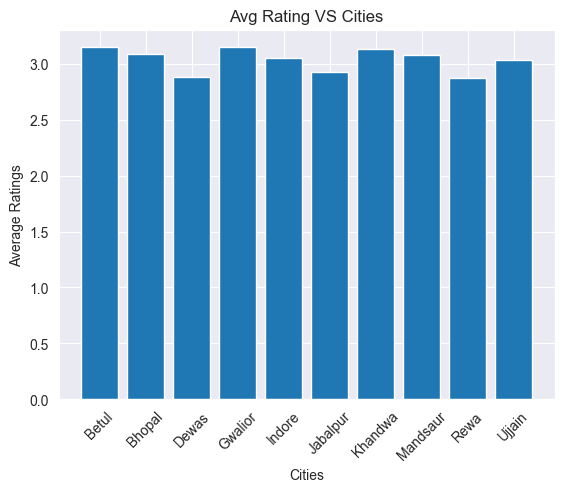

In [152]:
#graph of avg_rating VS cities

plt.bar(cityRating.index.values,cityRating['Avg_Rating'])
plt.xticks(rotation=45)
plt.xlabel("Cities")
plt.ylabel("Average Ratings")
plt.title("Avg Rating VS Cities")


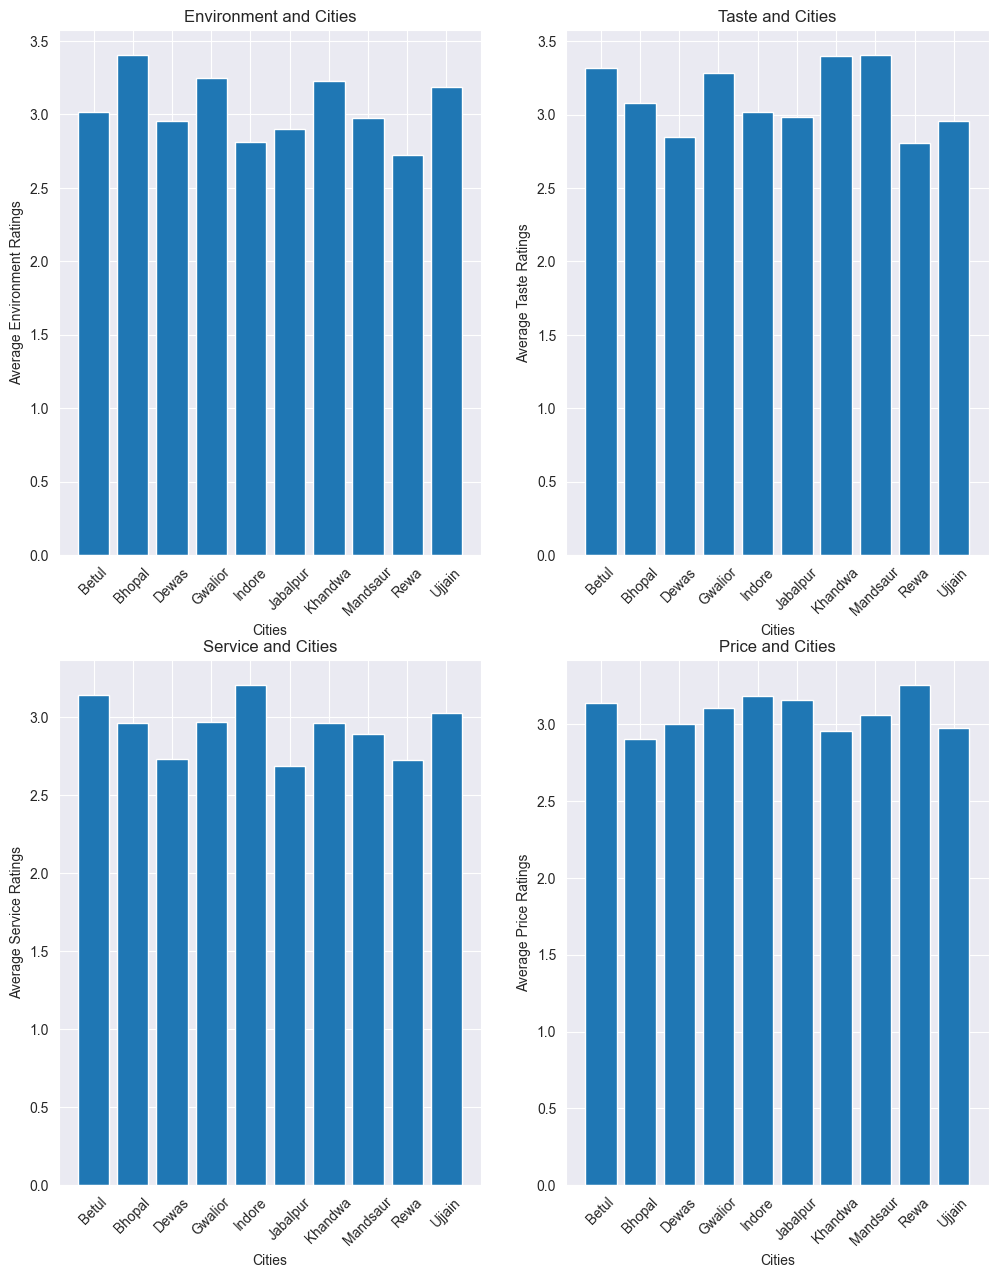

In [153]:
plt.figure(1, figsize = (12,15))          

plt.subplot(221)                            
plt.bar(cityRating.index.values,cityRating['Environment'])#Creating Bar Graph
plt.xticks(rotation=45)                                   
plt.xlabel("Cities")#label x-axis
plt.ylabel("Average Environment Ratings")#y-axis label
plt.title("Environment and Cities")

plt.subplot(222)  #subplot ID
plt.bar(cityRating.index.values,cityRating['Taste'])
plt.xticks(rotation=45)
plt.xlabel("Cities")
plt.ylabel("Average Taste Ratings")
plt.title("Taste and Cities")

plt.subplot(223)  #subplot ID
plt.bar(cityRating.index.values,cityRating['Service'])
plt.xticks(rotation=45)
plt.xlabel("Cities")
plt.ylabel("Average Service Ratings")
plt.title("Service and Cities")

plt.subplot(224)  #subplot ID
plt.bar(cityRating.index.values,cityRating['Price'])
plt.xticks(rotation=45)
plt.xlabel("Cities")
plt.ylabel("Average Price Ratings")
plt.title("Price and Cities")
plt.show()

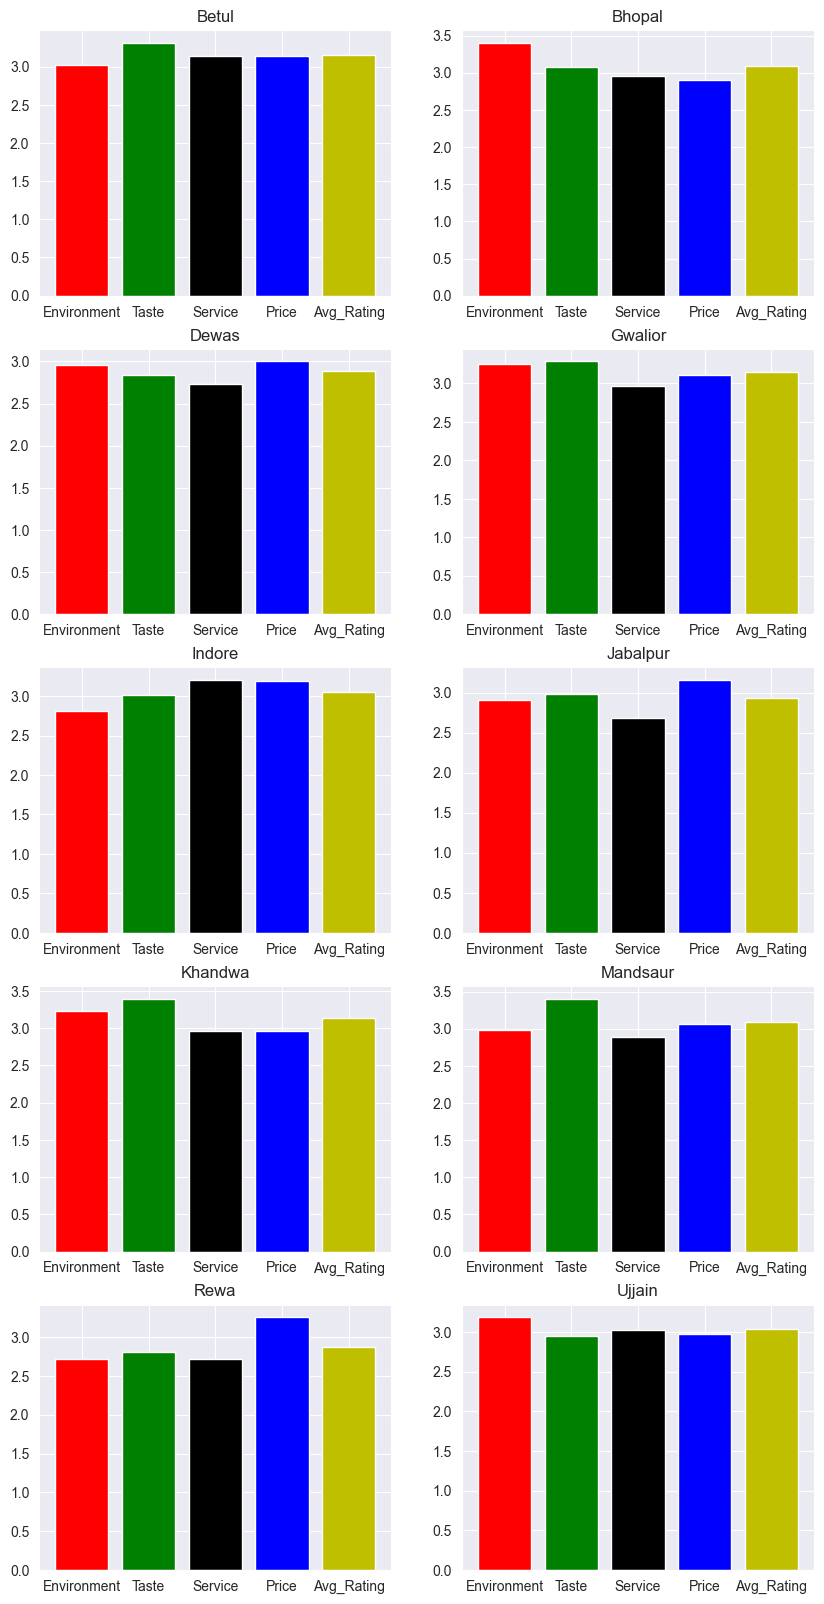

In [154]:
#plotting graph for each city performance 
plt.figure(figsize=(10,20))
for i,city in enumerate(cityRating.index.values):
    plt.subplot(5,2,i+1)
    plt.bar(cityRating.keys(),cityRating.iloc[i],color = ['r','g','k','b','y'])
    plt.title(city)

<Axes: ylabel='Cities'>

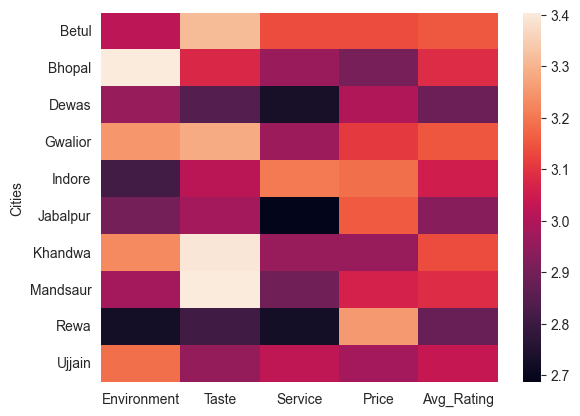

In [155]:
sns.heatmap(cityRating)#heatmap

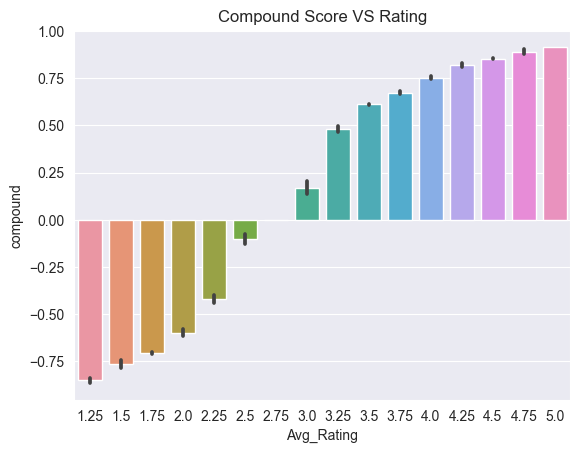

In [156]:
#Compound Score VS Average Rating Graph
#It helps to find the relation between Rating and Review Comments
ax=sns.barplot(data=dataSet,x="Avg_Rating",y="compound")
ax.set_title("Compound Score VS Rating")
plt.show();

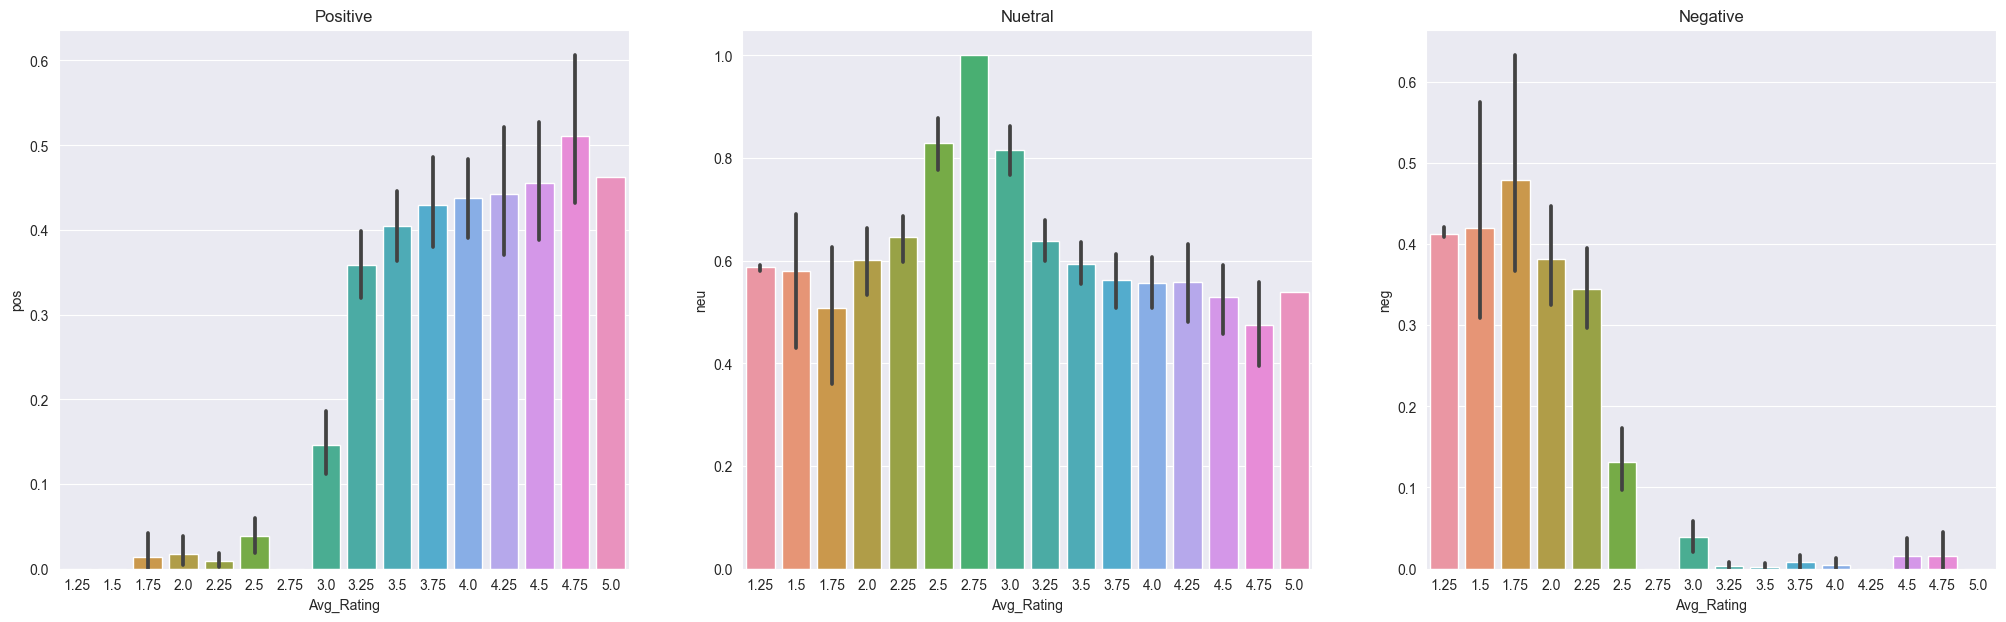

In [157]:
fig, axs=plt.subplots(1,3,figsize=(25,7))
plt.xticks(dataSet['Avg_Rating'])
sns.barplot(data=dataSet,x="Avg_Rating",y="pos",ax=axs[0])
sns.barplot(data=dataSet,x="Avg_Rating",y="neu",ax=axs[1])
sns.barplot(data=dataSet,x="Avg_Rating",y="neg",ax=axs[2])
axs[0].set_title("Positive")
axs[1].set_title("Nuetral")
axs[2].set_title("Negative")

plt.show()

In [158]:
dataSet.head()

,Customer,Environment,Taste,Service,Price,Cities,Avg_Rating,neg,neu,pos,compound,Review,Sentiment
0,1,1,1,2,1,Rewa,1.25,0.408,0.592,0.0,-0.8637,"I hate to disagree with my fellow Yelpers, but...",Negative ):
1,2,1,2,1,1,Indore,1.25,0.421,0.579,0.0,-0.8402,"Frozen pucks of disgust, with some of the wors...",Negative ):
2,3,1,1,2,1,Dewas,1.25,0.409,0.591,0.0,-0.8402,"Worse of all, he humiliated his worker right i...",Negative ):
3,4,1,2,1,2,Khandwa,1.50,0.275,0.725,0.0,-0.8089,"The staff are now not as friendly, the wait ti...",Negative ):
4,5,1,1,2,2,Indore,1.50,0.500,0.500,0.0,-0.7900,It's too bad the food is so damn generic.,Negative ):


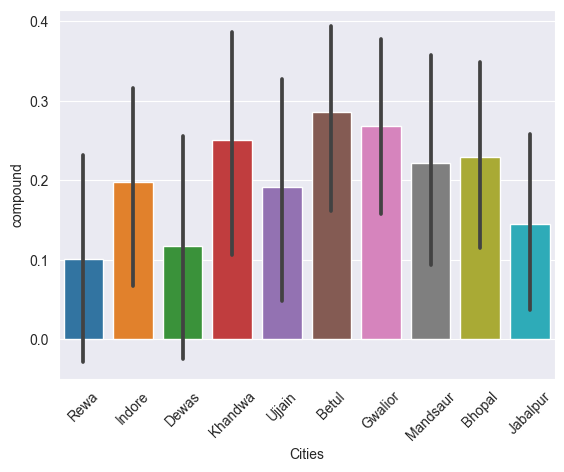

In [159]:
ax1=sns.barplot(data=dataSet,y="compound",x="Cities")
plt.xticks(rotation = 45)
plt.show()

In [160]:
average=[]
for i in dataSet.keys()[1:5]:
    average.append(dataSet[i].sum()/total_count)

In [161]:
average

[3.0460921843687374, 3.1122244488977957, 2.935871743486974, 3.0781563126252505]

In [162]:
lis  = dataSet.keys()[1:5]
lis

Index(['Environment', 'Taste', 'Service', 'Price'], dtype='object')

Text(0.5, 1.0, 'Attributes and Rating')

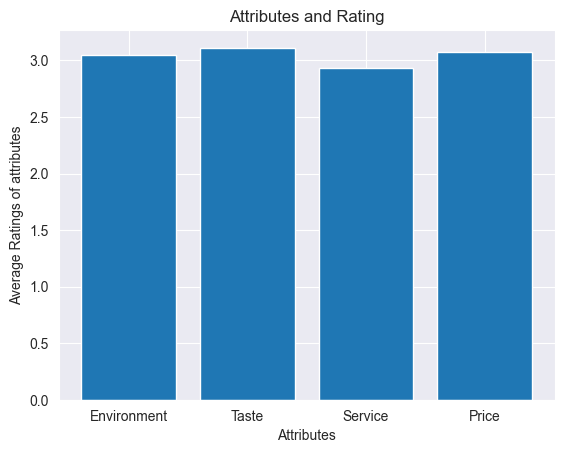

In [163]:
plt.bar(lis,average)
plt.xlabel("Attributes")
plt.ylabel("Average Ratings of attributes")
plt.title("Attributes and Rating")

In [164]:
cityRating = DataSet.groupby('Cities').mean()
cityRating.drop(columns = ['Customer'],inplace = True)
cityRating

C:\Users\praja\AppData\Local\Temp\ipykernel_16072\1569316516.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cityRating = DataSet.groupby('Cities').mean()


,Environment,Taste,Service,Price,Avg_Rating
Cities,,,,,
Betul,3.019608,3.313725,3.137255,3.137255,3.151961
Bhopal,3.403846,3.076923,2.961538,2.903846,3.086538
Dewas,2.955556,2.844444,2.733333,3.000000,2.883333
Gwalior,3.250000,3.285714,2.964286,3.107143,3.151786
Indore,2.813559,3.016949,3.203390,3.186441,3.055085
Jabalpur,2.901961,2.980392,2.686275,3.156863,2.931373
Khandwa,3.229167,3.395833,2.958333,2.958333,3.135417
Mandsaur,2.978723,3.404255,2.893617,3.063830,3.085106
Rewa,2.723404,2.808511,2.723404,3.255319,2.877660
